# **Desafio de Regressão:**

**Nome:** Gustavo Bartholomeu Trad Souza

**Nº USP:** 11219216

**Disciplina:** SCC0277 - Competições de Ciências de Dados

**Docente:** Fernando Pereira dos Santos

**Universidade de São Paulo (USP)**

Utilizando a metodologia básica de um projeto para ciência de dados, implemente possíveis soluções para o seguinte estudo de caso (https://www.kaggle.com/datasets/podsyp/sales-in-craft-beer-bar). Desenvolva e implemente métodos que se propõem a estimar a variável de saída.

Em seu projeto deverá constar uma análise detalhada do dataset e descrição das transformações de dados realizadas com suas respectivas justificativas. Adicionalmente, crie um baseline com as técnicas contidas nesta aula. Como forma de superar este baseline, pesquise por métodos e técnicas mais complexas. Você deverá entregar um relatório com os seguintes itens:

1. Descrição do problema e análise dos dados
2. Descrição das técnicas utilizadas
3. Interpretação dos resultados obtidos
4. Conclusão
5. Apêndice (descrição das técnicas de Regressão apresentadas pelos colegas durante os seminários)

In [ ]:
# Importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


import math

np.random.seed(seed=42)
prod_code =  'Product_code'

# **1. Descrição do problema e análise dos dados** 

O conjunto de dados fornecido apresenta informações sobre produtos que são geralmente vendidos em bares e restaurantes, com informações relacionadas à fabricação, composição e venda por parte do fornecedor e também informações sobre vendas relaizadas em um estabelecimento russo chamado **Nelson Sauvin Bar** com os ítens presentes no primeiro dataset. Com essas informações é possível a realização da tarefa de regressão nos dados a fim de predizer a quantidade de vendas ou o lucro que seria obtido de um determinado produto, que está presente na base de produtos mas que não era comercializado na loja, dadas algumas informaçãoes sobre esse produto. 



## **1.1. Descrição dos dados**
O dataset é composto de duas tabelas com informações sobre produtos oferecidos e o histórico de vendas de um bar russo chamado **Nelson Sauvin Bar**.

\
O arquivo **Product_range.csv** contém dados sobre o conjunto de todos os tipos de produtos (cerveja, salgadinhos, refrigerantes e etc.) oferecidos aos clientes pelo Nelson Sauvin Bar. Este conjunto de produtos pode ser mais ou menos especializado ou genérico e deve corresponder às expectativas do mercado-alvo da empresa. Os produtos são descritos nas seguintes 8 colunas:
  * **Product_code**: Código único de identificação de cada produto.
  * **Vendor_code**: Código único que identifica o vendedor do produto.
  * **Name**: Nome da SKU produto.
  * **Retail_price**: Preço de varejo do produto.
  * **Base_unit**: Únidade base de venda do produto (litros, peças, etc...).
  * **Country_of_Origin**: País de fabricação do produto.
  * **Size**: Tamanho do produto.
  * **ABV (Alcohol by Volume)**: Porcentágem de álcool por volume do produto - relevante para as bebidas alcóolicas.

\
O arquivo **Transactions.csv** contém dados sobre a venda de cerveja artesanal do bar. Este tipo de cerveja é tipicamente fabricado em pequenos lotes, usando métodos tradicionais e ingredientes de alta qualidade. Os bares de cerveja artesanal normalmente oferecem uma ampla seleção de cervejas artesanais de cervejarias locais e regionais, bem como de outras partes do mundo. As 8 colunas do dataset são:
  * **Date_and_time_of_unloading**: Data e hora da compra.
  * **Product_code**: Código único de identificação de cada produto.
  * **Amount**: O número de unidades vendidas.
  * **Sale_amount**: Quantia total de dinheiro que a empresa ganhou com a venda.
  * **Discount_amount**: Quantia de dinheiro deduzida do preço original de um produto.
  * **Profit**: Diferença entre a receita que a empresa obtém e os custos associados à produção e venda de seus produtos.
  * **Percentage_markup**: Valor pelo qual o custo de um produto é aumentado para determinar o preço de venda.
  * **Discount_percentage**: Porcentagem de desconto concedido a um produto.

\


In [ ]:
# Carregamento do dataset de produtos
product_df = pd.read_csv('Product_range.csv')

# remove as linhas com Product_code nulo
product_df = product_df[product_df[prod_code].notna()]

product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5314 entries, 0 to 5313
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_code       5314 non-null   int64  
 1   Vendor_code        4288 non-null   object 
 2   Name               5314 non-null   object 
 3   Retail_price       4878 non-null   float64
 4   Base_unit          4910 non-null   object 
 5   Country_of_Origin  4205 non-null   object 
 6   Size               4626 non-null   float64
 7   ABV                4622 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 373.6+ KB


In [ ]:
# Carregamento do dataset de transações
transaction_df = pd.read_csv('Transactions.csv')

# remove as linhas com Product_code nulo
transaction_df = transaction_df[transaction_df[prod_code].notna()]

transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18016 entries, 0 to 18015
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date_and_time_of_unloading  18016 non-null  object 
 1   Product_code                18016 non-null  int64  
 2   Amount                      18016 non-null  float64
 3   Sale_amount                 17990 non-null  float64
 4   Discount_amount             13723 non-null  float64
 5   Profit                      18013 non-null  float64
 6   Percentage_markup           17294 non-null  float64
 7   Discount_percentage         13723 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.2+ MB


## **1.2. Preparação do dataset**

As colunas **Product_code** e **Name** serão removidas para os algorítimos de regressão pois, além de possuíream a mesma semantica, ambas identificam univocadamente cada produto, portanto não são interessantes para a tarefa de regressão.

In [ ]:
product_df = product_df.drop(['Name'], axis=1)

Em seguida o dataset com as transações será preparado de forma que todas as informações acerca de um determinado produto sejam condensada em apenas uma linha. Para isso, inicialmente, serão  mantidas as colunas referentes à quantidade de produtos vendidos (**Amount**) e o lucro total obtido com as vendas de cada produto (**Profit**). Em seguida esses valores serão somados de acordo com o id do produto para que seja calculado o total de vendas, o total de dinheiro adquirido com o produto e o lucro total do produto.

In [ ]:
transaction_df = transaction_df[[prod_code, 'Amount',  'Profit']]
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18016 entries, 0 to 18015
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_code  18016 non-null  int64  
 1   Amount        18016 non-null  float64
 2   Profit        18013 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 563.0 KB


## **1.3. Atributos quantitativos**

As colunas presentes nos datasets finais com uma semântica quantitativa são: 
**Retail_price**, **Size**, **ABV** no dataset com as informações de cada produto e as colunas: **Amount**, **Sale_amount** e **Profit** no dataset de transações.

In [ ]:
quant_cols_prod = ['Retail_price', 'Size', 'ABV']
quant_cols_trans = ['Amount', 'Profit']

### **1.3.1. Substituição dos valores faltantes**

O preenchimento dos dados faltantes no caso dos atributos quantitatiovos será realizado através do calculo do valor médio dos valores contidos no atributo.

In [ ]:
def print_null_prod(df, cols):
  print(df[cols].isnull().sum())

print_null_prod(product_df, quant_cols_prod)

Retail_price    436
Size            688
ABV             692
dtype: int64


In [ ]:
for col in quant_cols_prod:
  #calcula a média da coluna
  mean_value = product_df[col].mean()
  # substitui os valores faltantes pela média calculada
  product_df[col].fillna(value=mean_value, inplace=True)

print_null_prod(product_df, quant_cols_prod)

Retail_price    0
Size            0
ABV             0
dtype: int64


No dataset de transações as entradas com valores faltantes também serão substituidas pela média da coluna, dessa forma será possível realizar a soma dos valores totais de cada produto.

In [ ]:
print_null_prod(transaction_df, quant_cols_trans)

Amount    0
Profit    3
dtype: int64


In [ ]:
# preenche as demias colunas com a média da coluna
transaction_df[quant_cols_trans] = transaction_df[quant_cols_trans].fillna(transaction_df[quant_cols_trans].mean())

print_null_prod(transaction_df, quant_cols_trans)

Amount    0
Profit    0
dtype: int64


### **1.3.2. Normalização dos dados**

Será aplicada a normalização min-max nas colunas quantitativas da tabela de produtos de forma que os valores ficarão entre 0 e 1. Na tabela de transações será realizada a soma dos valores quantitativos portanto não será realizada a normalização desses valores.

In [ ]:
# aplica normalização min-max nas colunas da tabela de produtos
for col in quant_cols_prod: product_df[col] = (product_df[col] - product_df[col].min()) / (product_df[col].max() - product_df[col].min()) 

## **1.4. Atributos categóricos**

OApenas o dataset de produtos possui colunas categóricas. Os atributos categóricos nesse dataset são: **Vendor_code**, **Base_unit**, **Country_of_Origin**. 

In [ ]:
cat_cols = ['Base_unit', 'Country_of_Origin', 'Vendor_code']

### **1.4.1. Substituição dos valores faltantes**

Não será realizada a substituição dos valores faltantes para os atributos categóricos visto que a substituição pela moda pode desbalancear o dataset, portanto as linhas com valores faltantes serão removidas do dataset, evitando um aumento no desbalanceamento.

In [ ]:
print_null_prod(product_df,  cat_cols)

Base_unit             404
Country_of_Origin    1109
Vendor_code          1026
dtype: int64


In [ ]:
#for col in cat_cols: product_df[col] = product_df[col].fillna('Unknown_' + col)
product_df = product_df.dropna()

print_null_prod(product_df,  cat_cols)

Base_unit            0
Country_of_Origin    0
Vendor_code          0
dtype: int64


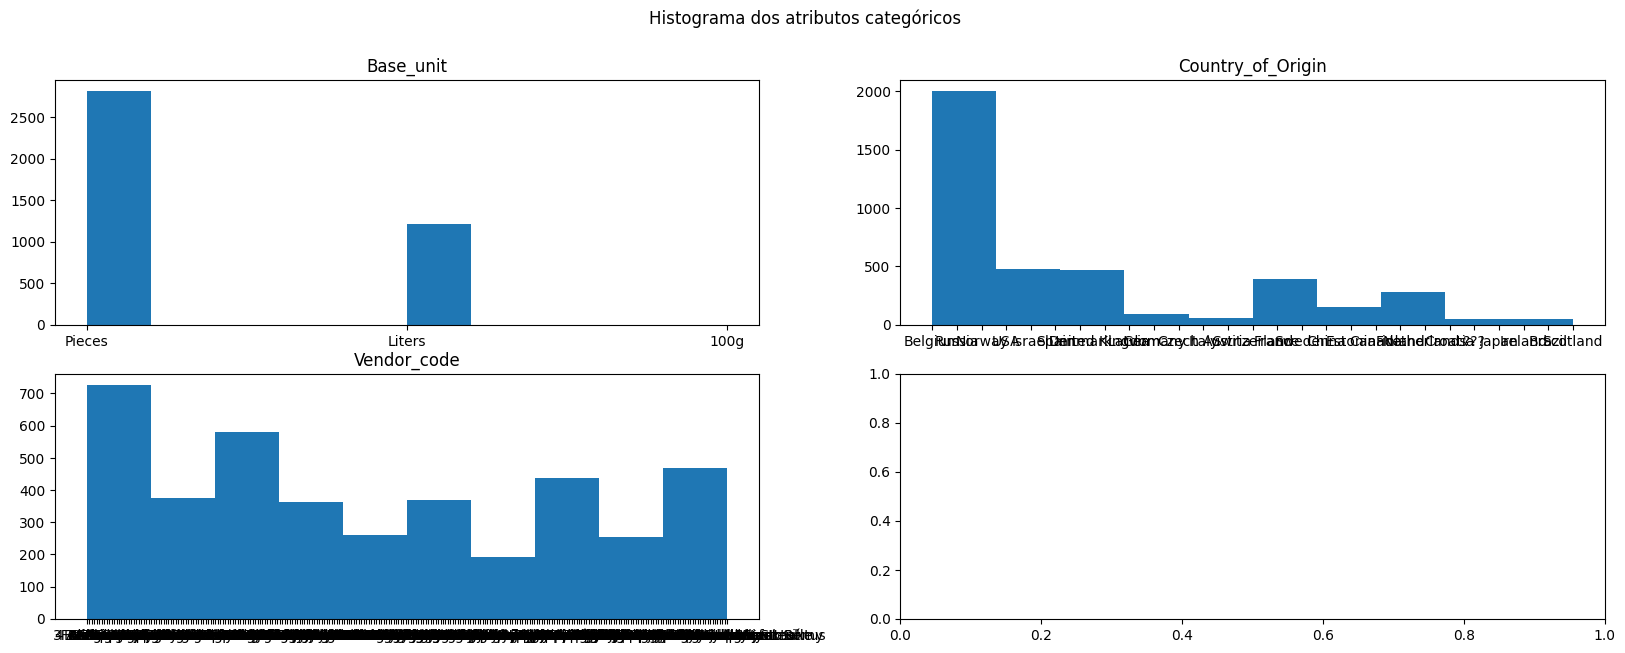

In [ ]:
lin = math.ceil(math.sqrt(len(cat_cols)))
col = math.ceil(math.sqrt(len(cat_cols)))

fig, axs = plt.subplots(lin, col, figsize=(20, 7))
axs = axs.ravel() 
fig.suptitle('Histograma dos atributos categóricos')
for i, col in enumerate(cat_cols):
    axs[i].hist(product_df[col])
    axs[i].set_title(col)

### **1.4.2. Codificação dos dado**

As colunas categóricas possuem as seguintes quantidades de valores únicos (classes) em cada:

In [ ]:
for col in cat_cols: print(col, ':', product_df[col].nunique())

Base_unit : 3
Country_of_Origin : 27
Vendor_code : 260


Após o preenchimento dos dados faltantes é realizada a conversão dos atributos categóricos de classes de forma que esses possam assumir valores numéricos (strings ou inteiros com semântica de classe não podem ser passados para os algoritimos de aprendizado), para isso será criada uma coluna para cada classe presente nas colunas categóricas e essa nova coluna irá receber o valor 1 caso a entrada possuisse aquela classe na coluna original e 0 caso contrário. O dataset final de produtos possui 310 colunas e 5314 linhas.

In [ ]:
for col in cat_cols:
  dummy_vars = pd.get_dummies(product_df[col])
  product_df = pd.concat([product_df, dummy_vars], axis=1, sort=False)
  product_df = product_df.drop(columns=[col])

product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4021 entries, 14 to 5312
Columns: 294 entries, Product_code to de Blaugies
dtypes: float64(3), int64(1), uint8(290)
memory usage: 1.3 MB


## **1.5. Correlação entre os dados**

Foi definida uma correlação máxima de 0.7, á partir da qual um dos elementos da correlação será removido. O dataset de transações não terá sua correlação medida pois os valores que ela apresenta serão os valores alvo da regressão e calculados separadamente, com o objetivo de testar qual deles pode ser melhor descrito pelas informações do produto.

In [ ]:
max_corr = 0.7
corr = product_df.corr()

matrizSuperior = np.triu(np.ones(corr.shape), k=1).astype(bool)
correlacaoSuperior = corr.where(matrizSuperior)

atributos = [col for col in correlacaoSuperior.columns if any(abs(correlacaoSuperior[col]) >= max_corr)]
print("Atributos alta correlação:")
print(atributos)


Atributos alta correlação:
['Pieces', 'Netherlands', 'Arpus', 'Axiom', 'Bevog', 'Brasserie des Franches-Montagnes', 'BrewDog', 'Chang', 'CoolHead Brew', 'Dogma', 'Hitachino NEST', 'Lervig', 'Naparbier', 'Netherlands', 'Pohjala', 'Shimeji Beer', 'Snacks', 'Tempest Brewing', 'The Garage Brewery', 'To Ol', 'White Hag']


In [ ]:
product_df = product_df.drop(columns=atributos)
product_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4021 entries, 14 to 5312
Columns: 273 entries, Product_code to de Blaugies
dtypes: float64(3), int64(1), uint8(269)
memory usage: 1.2 MB


## **1.6. Dataset final**

Para a criaçaõ dos datasets finais, inicialmente haverá a separação do dataset de produtos entre os produtos presentes no dataset de transações e os produtos que não estão. Essa separação permite que o algoritimo seja treinado e avaliado com os produtos oferecidos pelo bar e em seguida com o outro dataset é possível utilizar o algoritimo treinado para prever os lucros do bar com produtos que nao são comercializados por ele.

In [ ]:
all_prods = product_df[prod_code].unique()
store_prods = transaction_df[prod_code].unique()

not_in_store_prods = [prod for prod in all_prods if prod not in store_prods]
not_in_all_prods = [prod for prod in store_prods if prod not in all_prods]

print('Num de produtos em Transactions.csv que não estão em Product_range.csv: ', len(not_in_all_prods))
print('Num de produtos em Product_range.csv que não estão em Transactions.csv: ', len(not_in_store_prods))
print('\n------------------------------\n')
#separação do dataset entre predição (que não estão no transaction) e treino (que estão no transaction)
to_predict = product_df.loc[product_df[prod_code].isin(not_in_store_prods)].copy().reset_index()
to_train = product_df.loc[product_df[prod_code].isin(store_prods) & product_df[prod_code].isin(all_prods)].copy().reset_index()
print('Dataset de predição')
print(to_predict.info())
print('\n------------------------------\n')
print('Dataset de treino')
print(to_train.info())

Num de produtos em Transactions.csv que não estão em Product_range.csv:  248
Num de produtos em Product_range.csv que não estão em Transactions.csv:  2890

------------------------------

Dataset de predição
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Columns: 274 entries, index to de Blaugies
dtypes: float64(3), int64(2), uint8(269)
memory usage: 872.2 KB
None

------------------------------

Dataset de treino
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Columns: 274 entries, index to de Blaugies
dtypes: float64(3), int64(2), uint8(269)
memory usage: 341.4 KB
None


O numero de produtos distintos no primeiro dataset é de 5314 e o número de produtos distintos envolvidos nas transações descritas pelo segundo dataset é de 2509 e todos os produtos vendidos pelo bar estão descritos no dataset de produtos, portanto há 2805 produtos que não são vendidos pelo **Nelson Sauvin Bar** e que poderiam ser vendidos caso se mostrassem vantajosos.
Para isso inicialmente o dataset **Product_range.csv** será separado em um dataset dos produtos contidos no **Transactions.csv** e outro com as informações dos produtos que não estão contidos nas transações. Em seguida o dataset de treino e o de transações será unido pela coluna de **Product_code**.




In [ ]:
sum_df = transaction_df.groupby(prod_code, as_index=False).sum()
final_df = pd.merge(to_train, sum_df, on=prod_code).reset_index()
final_df = final_df.drop(['level_0', 'index', 'Product_code'], axis=1)

final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Columns: 274 entries, Retail_price to Profit
dtypes: float64(5), uint8(269)
memory usage: 341.4 KB


Dessa forma o dataset final possui 2509 linhas, cada uma contendo informações de um produto distinto e 299 colunas, sendo 3 delas as colunas alvo que deverão ser preditas pelos algoritimos de regressão.

In [ ]:
Y_cols = ['Amount', 'Profit']
X_cols = [col for col in final_df.columns if col not in Y_cols]

X_train, X_test, y_train, y_test = train_test_split(final_df[X_cols], final_df[Y_cols], test_size=0.2)

y_train_amount = y_train['Amount']
y_train_profit = y_train['Profit']

y_test_amount = y_test['Amount']
y_test_profit = y_test['Profit']

In [ ]:
final_df.head()

,Retail_price,Size,ABV,100g,Liters,???,Austria,Belgium,Brazil,Canada,...,Wild Lab,WildBeer,WildLab,XP Brew,Yablodar,Zagovor,Zavod,de Blaugies,Amount,Profit
0,0.100072,0.007538,0.268293,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,4.0,-216.93
1,0.111860,0.007538,0.219512,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3.0,863.00
2,0.188476,0.020101,0.234146,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2.0,932.00
3,0.294560,0.020101,0.268293,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2.0,615.06
4,0.176689,0.007538,0.239024,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,612.00


---
# **2. Descrição das técnicas utilizadas** 

Os algoritimos de regressão deverão receber como entrada os dados dos produtos, sendo esses distribuidos em 296 colunas, e deverão prever um valor de saída. Para cada técnica serão utilizados três valores diferentes para Y, a quantidade de unidades vendidas e olucro total obtido com essas vendas.

In [ ]:
MSE_vals_amount = {}
RScore_vals_amount = {}
MSE_vals_profit = {}
RScore_vals_profit = {}

## **2.1. Regressão Multipla**

O primeiro conjunto de métodos a sr utilizado é a regressão multipla. Esse método consiste em utilizar várias variáveis simultaneamente para encontrar a saída desejada, e esses coeficientes são ajustados a fim de minimizar a soma dos quadrados residuais entre os valores alvos e os valores preditos. Serão utilizadas duas variantes desse método, uma delas sendo a regressão Linear e a outra a Regressão Ridge com diferentes valores para o parãmetro alfa.

In [ ]:
alpha_values = [0, 0.5, 1, 5, 15]

def test_linear_regression(y_train, y_test, data_type):
  key = 'Linear'
  #regressão com todos os atributos disponíveis
  regr = LinearRegression().fit(X_train, y_train)
  y_pred = regr.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  if data_type == 'amount':
    MSE_vals_amount[key] = mse
    RScore_vals_amount[key] = r2
  else:
    MSE_vals_profit[key] = mse
    RScore_vals_profit[key] = r2

  print('------------------------')
  print( key + " - MSE: %.2f" % mse)
  print("R Score: %.2f" % r2)

  for alpha in alpha_values:
    key = "Ridge alpha = " + str(alpha)

    regRidge = Ridge(alpha=alpha).fit(X_train, y_train)
    y_pred = regRidge.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if data_type == 'amount':
      MSE_vals_amount[key] = mse
      RScore_vals_amount[key] = r2
    else:
      MSE_vals_profit[key] = mse
      RScore_vals_profit[key] = r2

    print('------------------------')
    print( key + " - MSE: %.2f" % mse)
    print("R Score: %.2f" % r2)

In [ ]:
print('Prediçáo da quantidade de produtos vendidos\n')
test_linear_regression(y_train_amount, y_test_amount, 'amount')

Prediçáo da quantidade de produtos vendidos

------------------------
Linear - MSE: 32829384611439798613180416.00
R Score: -4047064813849089671168.00
------------------------
Ridge alpha = 0 - MSE: 321672262763417596949944409784320.00
R Score: -39654367927670750961341562880.00
------------------------
Ridge alpha = 0.5 - MSE: 6134.26
R Score: 0.24
------------------------
Ridge alpha = 1 - MSE: 6129.50
R Score: 0.24
------------------------
Ridge alpha = 5 - MSE: 6245.22
R Score: 0.23
------------------------
Ridge alpha = 15 - MSE: 6493.06
R Score: 0.20


In [ ]:
print('Prediçáo dos lucros obtidos por produto\n')
test_linear_regression(y_train_profit, y_test_profit, 'profit')

Prediçáo dos lucros obtidos por produto

------------------------
Linear - MSE: 9928414451794768867470356774912.00
R Score: -31683397819614195875840.00
------------------------
Ridge alpha = 0 - MSE: 26130388737824104124233380849277468672.00
R Score: -83386879705851460484455202816.00
------------------------
Ridge alpha = 0.5 - MSE: 261278794.80
R Score: 0.17
------------------------
Ridge alpha = 1 - MSE: 259794092.61
R Score: 0.17
------------------------
Ridge alpha = 5 - MSE: 259187101.74
R Score: 0.17
------------------------
Ridge alpha = 15 - MSE: 262554851.61
R Score: 0.16


## **2.2. Máquina de Vetor de Suporte para Regressão (SVR)**
Ao invés de ajustar as margens para separar as classes, a idéia do SVR é ajustar a maior quantidade de exemplos entre as margens, sendo controlada por um hiperparâmetro epsilon

In [ ]:
epsilon_values = [0, 0.5, 1, 5, 20]

def test_svm(y_train, y_test, data_type):
  for epsilon in epsilon_values:
    key = "SVM - alpha = " + str(epsilon)
    regSVM = LinearSVR(epsilon=epsilon).fit(X_train, y_train)
    y_pred = regSVM.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if data_type == 'amount':
      MSE_vals_amount[key] = mse
      RScore_vals_amount[key] = r2
    else:
      MSE_vals_profit[key] = mse
      RScore_vals_profit[key] = r2

    print('------------------------')
    print( key + " - MSE: %.2f" % mse)
    print("R Score: %.2f" % r2)

In [ ]:
print('Prediçáo da quantidade de produtos vendidos\n')
test_svm(y_train_amount, y_test_amount, 'amount')

Prediçáo da quantidade de produtos vendidos

------------------------
SVM - alpha = 0 - MSE: 8210.61
R Score: -0.01
------------------------
SVM - alpha = 0.5 - MSE: 8204.29
R Score: -0.01
------------------------
SVM - alpha = 1 - MSE: 8204.14
R Score: -0.01
------------------------
SVM - alpha = 5 - MSE: 8195.26
R Score: -0.01
------------------------
SVM - alpha = 20 - MSE: 7895.11
R Score: 0.03


In [ ]:
print('Prediçáo dos lucros obtidos por produto\n')
test_svm(y_train_profit, y_test_profit, 'profit')

Prediçáo dos lucros obtidos por produto

------------------------
SVM - alpha = 0 - MSE: 353297609.38
R Score: -0.13
------------------------
SVM - alpha = 0.5 - MSE: 353320215.00
R Score: -0.13
------------------------
SVM - alpha = 1 - MSE: 353318951.66
R Score: -0.13
------------------------
SVM - alpha = 5 - MSE: 353288074.61
R Score: -0.13
------------------------
SVM - alpha = 20 - MSE: 353268270.43
R Score: -0.13


## **2.3. Árvores de Regressão**

Assim como no método para classificação, a Árvore de Decisão para Regressão objetiva predizer um valor. Contudo, neste caso, é uma variável quantitativa.

In [ ]:
depths = [2, 5, 10, 20, 50, 100]

def test_dtr(y_train, y_test, data_type):
  for d in depths:
    key = "Decision Tree - max_depth = " + str(d)
    y_pred = DecisionTreeRegressor(max_depth=d).fit(X_train,y_train).predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if data_type == 'amount':
      MSE_vals_amount[key] = mse
      RScore_vals_amount[key] = r2
    else:
      MSE_vals_profit[key] = mse
      RScore_vals_profit[key] = r2

    print('------------------------')
    print( key + " - MSE: %.2f" % mse)
    print("R Score: %.2f" % r2)

In [ ]:
print('Prediçáo da quantidade de produtos vendidos\n')
test_dtr(y_train_amount, y_test_amount, 'amount')

Prediçáo da quantidade de produtos vendidos

------------------------
Decision Tree - max_depth = 2 - MSE: 6670.59
R Score: 0.18
------------------------
Decision Tree - max_depth = 5 - MSE: 8636.89
R Score: -0.06
------------------------
Decision Tree - max_depth = 10 - MSE: 10082.88
R Score: -0.24
------------------------
Decision Tree - max_depth = 20 - MSE: 9291.37
R Score: -0.15
------------------------
Decision Tree - max_depth = 50 - MSE: 9642.63
R Score: -0.19
------------------------
Decision Tree - max_depth = 100 - MSE: 10542.70
R Score: -0.30


In [ ]:
print('Prediçáo dos lucros obtidos por produto\n')
test_dtr(y_train_profit, y_test_profit, 'profit')

Prediçáo dos lucros obtidos por produto

------------------------
Decision Tree - max_depth = 2 - MSE: 289035009.16
R Score: 0.08
------------------------
Decision Tree - max_depth = 5 - MSE: 272123033.23
R Score: 0.13
------------------------
Decision Tree - max_depth = 10 - MSE: 449118378.22
R Score: -0.43
------------------------
Decision Tree - max_depth = 20 - MSE: 448878627.48
R Score: -0.43
------------------------
Decision Tree - max_depth = 50 - MSE: 463761329.02
R Score: -0.48
------------------------
Decision Tree - max_depth = 100 - MSE: 431010306.14
R Score: -0.38


## **2.4. Ensembles**

### **2.4.1. Bagging (Bootstrap AGGregatION)**

Utiliza **múltiplas versões do conjunto de treinamento**, cada um sendo criado selecionando $n' < n$ exemplos a partir de $D$ **com reposição**. Cada um dos subconjuntos formados é utilizado para **treinar um modelo paralelo** e, ao final, **o resultado final é composto pela média dos valores**. 

Geralmente, o modelo é exatamente o mesmo (árvores de decisão, SVMs, ou outro qualquer).



In [ ]:
n_est = [5, 10, 50, 100]

def test_bagging(y_train, y_test, data_type):
  for n in n_est:
    key = "Bagging - n_estimators = " + str(n)
    y_pred = BaggingRegressor(estimator=SVR(), n_estimators=n).fit(X_train,y_train).predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if data_type == 'amount':
      MSE_vals_amount[key] = mse
      RScore_vals_amount[key] = r2
    else:
      MSE_vals_profit[key] = mse
      RScore_vals_profit[key] = r2

    print('------------------------')
    print( key + " - MSE: %.2f" % mse)
    print("R Score: %.2f" % r2)

In [ ]:
print('Prediçáo da quantidade de produtos vendidos\n')
test_bagging(y_train_amount, y_test_amount, 'amount')

Prediçáo da quantidade de produtos vendidos

------------------------
Bagging - n_estimators = 5 - MSE: 8278.56
R Score: -0.02
------------------------
Bagging - n_estimators = 10 - MSE: 8278.33
R Score: -0.02
------------------------
Bagging - n_estimators = 50 - MSE: 8285.50
R Score: -0.02
------------------------
Bagging - n_estimators = 100 - MSE: 8293.48
R Score: -0.02


In [ ]:
print('Prediçáo dos lucros obtidos por produto\n')
test_bagging(y_train_profit, y_test_profit, 'profit')

Prediçáo dos lucros obtidos por produto

------------------------
Bagging - n_estimators = 5 - MSE: 338210060.56
R Score: -0.08
------------------------
Bagging - n_estimators = 10 - MSE: 338038174.95
R Score: -0.08
------------------------
Bagging - n_estimators = 50 - MSE: 338300053.90
R Score: -0.08
------------------------
Bagging - n_estimators = 100 - MSE: 338292027.89
R Score: -0.08


### **2.4.2. Random Forest**

**Random Forest** é o método de Bagging mais conhecido e utilizado, sendo baseado em Árvores de Decisão, mas que possui algumas particularidades:
- A execução do boostrap busca criar subconjuntos descorrelacionados entre si;
- Calcula a média dos resultados.

In [ ]:
n_est = [2, 10, 50]
max_d = [2, 10, 50]

def test_random_forest(y_train, y_test, data_type):
  for n in n_est:
    for d in max_d:
      key = "Random Forest - n_estimators = " + str(n) + ", max_depth = " + str(d)
      y_pred = RandomForestRegressor(n_estimators=n, max_depth=d).fit(X_train,y_train).predict(X_test)

      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      if data_type == 'amount':
        MSE_vals_amount[key] = mse
        RScore_vals_amount[key] = r2
      else:
        MSE_vals_profit[key] = mse
        RScore_vals_profit[key] = r2

      print('------------------------')
      print( key + " - MSE: %.2f" % mse)
      print("R Score: %.2f" % r2)
        

In [ ]:
print('Prediçáo da quantidade de produtos vendidos\n')
test_random_forest(y_train_amount, y_test_amount, 'amount')

Prediçáo da quantidade de produtos vendidos

------------------------
Random Forest - n_estimators = 2, max_depth = 2 - MSE: 6071.79
R Score: 0.25
------------------------
Random Forest - n_estimators = 2, max_depth = 10 - MSE: 5234.37
R Score: 0.35
------------------------
Random Forest - n_estimators = 2, max_depth = 50 - MSE: 8358.94
R Score: -0.03
------------------------
Random Forest - n_estimators = 10, max_depth = 2 - MSE: 6074.31
R Score: 0.25
------------------------
Random Forest - n_estimators = 10, max_depth = 10 - MSE: 4898.72
R Score: 0.40
------------------------
Random Forest - n_estimators = 10, max_depth = 50 - MSE: 6749.81
R Score: 0.17
------------------------
Random Forest - n_estimators = 50, max_depth = 2 - MSE: 6403.60
R Score: 0.21
------------------------
Random Forest - n_estimators = 50, max_depth = 10 - MSE: 4519.32
R Score: 0.44
------------------------
Random Forest - n_estimators = 50, max_depth = 50 - MSE: 5188.25
R Score: 0.36


In [ ]:
print('Prediçáo dos lucros obtidos por produto\n')
test_random_forest(y_train_profit, y_test_profit, 'profit')

Prediçáo dos lucros obtidos por produto

------------------------
Random Forest - n_estimators = 2, max_depth = 2 - MSE: 284892939.70
R Score: 0.09
------------------------
Random Forest - n_estimators = 2, max_depth = 10 - MSE: 277262474.07
R Score: 0.12
------------------------
Random Forest - n_estimators = 2, max_depth = 50 - MSE: 348003942.14
R Score: -0.11
------------------------
Random Forest - n_estimators = 10, max_depth = 2 - MSE: 287745897.26
R Score: 0.08
------------------------
Random Forest - n_estimators = 10, max_depth = 10 - MSE: 356659467.77
R Score: -0.14
------------------------
Random Forest - n_estimators = 10, max_depth = 50 - MSE: 383786800.96
R Score: -0.22
------------------------
Random Forest - n_estimators = 50, max_depth = 2 - MSE: 286018408.13
R Score: 0.09
------------------------
Random Forest - n_estimators = 50, max_depth = 10 - MSE: 323713736.90
R Score: -0.03
------------------------
Random Forest - n_estimators = 50, max_depth = 50 - MSE: 3270595

### **2.4.3. AdaBoost (Adaptive Boosting)**

A ideia de **Boosting** é criar um regressor base e ir adicionando novos regressores para fortalecer este primeiro, aumentando sua performance.

In [ ]:
n_est = [2, 10, 50, 100]
def test_boosting(y_train, y_test, data_type):
  for n in n_est:
    key = "AdaBoost - n_estimators = " + str(n)
    y_pred = AdaBoostRegressor(n_estimators=n).fit(X_train,y_train).predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if data_type == 'amount':
      MSE_vals_amount[key] = mse
      RScore_vals_amount[key] = r2
    else:
      MSE_vals_profit[key] = mse
      RScore_vals_profit[key] = r2

    print('------------------------')
    print( key + " - MSE: %.2f" % mse)
    print("R Score: %.2f" % r2)

In [ ]:
print('Prediçáo da quantidade de produtos vendidos\n')
test_boosting(y_train_amount, y_test_amount, 'amount')

Prediçáo da quantidade de produtos vendidos

------------------------
AdaBoost - n_estimators = 2 - MSE: 6060.60
R Score: 0.25
------------------------
AdaBoost - n_estimators = 10 - MSE: 5458.94
R Score: 0.33
------------------------
AdaBoost - n_estimators = 50 - MSE: 7309.74
R Score: 0.10
------------------------
AdaBoost - n_estimators = 100 - MSE: 7177.58
R Score: 0.12


In [ ]:
print('Prediçáo dos lucros obtidos por produto\n')
test_boosting(y_train_profit, y_test_profit, 'profit')

Prediçáo dos lucros obtidos por produto

------------------------
AdaBoost - n_estimators = 2 - MSE: 302178681.81
R Score: 0.04
------------------------
AdaBoost - n_estimators = 10 - MSE: 371407273.02
R Score: -0.19
------------------------
AdaBoost - n_estimators = 50 - MSE: 347701165.31
R Score: -0.11
------------------------
AdaBoost - n_estimators = 100 - MSE: 357768952.97
R Score: -0.14


## **2.5. Multi-layer Perceptron (MLP)**
É uma técnica que consiste em acplar sequencialmente conjuntos de Perceptorns a fim de criar um aproximadpr de funções não linear. Através de operações com paramêtros ajustáveis chamados pesos e bias os dados de entrada são transformados em uma saída que é uma predição do atributo alvo, em seguida o erro entre o valor real e apredição é calculado e à partir desse erro é calculado o gradiente negativo (pois o objetivo é reduzir o erro) para cada parãmetro ajustávele os ajustes são aplicados.

In [ ]:
hidden_units = [100, (100, 50), (100, 100), (50, 50, 50)]
activations = ['logistic', 'relu']

def test_mlp(y_train, y_test, data_type):
  for h_u in hidden_units:
    for act in activations:
      key = "MLP - hidden_units = " + str(h_u) + ", activation = " + act
      y_pred = MLPRegressor(hidden_layer_sizes=h_u, activation=act, max_iter=1000).fit(X_train,y_train).predict(X_test)
      
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      if data_type == 'amount':
        MSE_vals_amount[key] = mse
        RScore_vals_amount[key] = r2
      else:
        MSE_vals_profit[key] = mse
        RScore_vals_profit[key] = r2

      print('------------------------')
      print( key + " - MSE: %.2f" % mse)
      print("R Score: %.2f" % r2)

In [ ]:
print('Prediçáo da quantidade de produtos vendidos\n')
test_mlp(y_train_amount, y_test_amount, 'amount')

Prediçáo da quantidade de produtos vendidos



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = 100, activation = logistic - MSE: 6081.31
R Score: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = 100, activation = relu - MSE: 6151.78
R Score: 0.24


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = (100, 50), activation = logistic - MSE: 6375.85
R Score: 0.21


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = (100, 50), activation = relu - MSE: 6191.92
R Score: 0.24


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = (100, 100), activation = logistic - MSE: 6060.44
R Score: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = (100, 100), activation = relu - MSE: 6289.00
R Score: 0.22


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = (50, 50, 50), activation = logistic - MSE: 6349.22
R Score: 0.22
------------------------
MLP - hidden_units = (50, 50, 50), activation = relu - MSE: 6089.28
R Score: 0.25


In [ ]:
print('Prediçáo dos lucros obtidos por produto\n')
test_mlp(y_train_profit, y_test_profit, 'profit')

Prediçáo dos lucros obtidos por produto



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = 100, activation = logistic - MSE: 356743795.75
R Score: -0.14


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = 100, activation = relu - MSE: 297199108.36
R Score: 0.05


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = (100, 50), activation = logistic - MSE: 360714131.22
R Score: -0.15


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = (100, 50), activation = relu - MSE: 257834969.95
R Score: 0.18


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = (100, 100), activation = logistic - MSE: 357566852.26
R Score: -0.14


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = (100, 100), activation = relu - MSE: 262103023.56
R Score: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------
MLP - hidden_units = (50, 50, 50), activation = logistic - MSE: 360719842.67
R Score: -0.15
------------------------
MLP - hidden_units = (50, 50, 50), activation = relu - MSE: 270825152.92
R Score: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# **3. Interpretação dos resultados obtidos**

Dentre os modelos experimentados, aqueles que obteveram os melhores resultados para a predição da quantidade de vendas de um determinado produto foi:



In [ ]:
MSE_vals_amount = dict(sorted(MSE_vals_amount.items(), key=lambda item: item[1]))
print('Menor MSE = ' + str(MSE_vals_amount[list(MSE_vals_amount)[0]]) + ' -> ' + list(MSE_vals_amount)[0])
RScore_vals_amount = dict(sorted(RScore_vals_amount.items(), key=lambda item: item[1]))
print('Maior R2 = ' + str(RScore_vals_amount[list(RScore_vals_amount)[-1]]) + ' -> ' + list(RScore_vals_amount)[-1])

Menor MSE = 4519.323495901773 -> Random Forest - n_estimators = 50, max_depth = 10
Maior R2 = 0.44287730887614163 -> Random Forest - n_estimators = 50, max_depth = 10


E os que obtiveram os melhores resultados na predição do lucro total obtido com um determinado produto foram: 

In [ ]:
MSE_vals_profit = dict(sorted(MSE_vals_profit.items(), key=lambda item: item[1]))
print('Menor MSE = ' + str(MSE_vals_profit[list(MSE_vals_profit)[0]]) + ' -> ' + list(MSE_vals_profit)[0])
RScore_vals_profit = dict(sorted(RScore_vals_profit.items(), key=lambda item: item[1]))
print('Maior R2 = ' + str(RScore_vals_profit[list(RScore_vals_profit)[-1]]) + ' -> ' + list(RScore_vals_profit)[-1])

Menor MSE = 257834969.95084238 -> MLP - hidden_units = (100, 50), activation = relu
Maior R2 = 0.1772011568993197 -> MLP - hidden_units = (100, 50), activation = relu


Esse resultado demonstra que o algoritimo a ser escolhido é bastante influenciado pela variável que está sendo predita, uma vez que com os mesmos dados de entrada, diferentes algoritimos se ajustaram melhor à diferentes tarefas..

In [ ]:
rf = RandomForestRegressor(n_estimators=10, max_depth=50).fit(X_train, y_train_amount)
dt = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train_profit)

In [ ]:
prod_codes = to_predict[prod_code]
prod_codes = [code for code in prod_codes]
to_predict = to_predict.drop(['index', prod_code], axis=1)
to_predict.head()

,Retail_price,Size,ABV,100g,Liters,???,Austria,Belgium,Brazil,Canada,...,Welde Braumanufaktur,Westvleteren Abdij St. Sixtus,Wild Lab,WildBeer,WildLab,XP Brew,Yablodar,Zagovor,Zavod,de Blaugies
0,0.388856,0.020101,0.268293,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.176689,0.020101,0.268293,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.129540,0.007538,0.297561,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.129540,0.007538,0.234146,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.182582,0.007538,0.278049,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pred_amount = rf.predict(to_predict).reshape((-1, 1))
pred_profit = dt.predict(to_predict).reshape((-1, 1))
prod_codes = np.array(prod_codes).reshape((-1, 1))

In [ ]:
print(np.shape(pred_amount))
print(np.shape(prod_codes))

(2890, 1)
(2890, 1)


In [ ]:
best_prods = np.concatenate([pred_profit, pred_amount, prod_codes], axis=1)
column_values = ['Profit', 'Amount', prod_code]
result = pd.DataFrame(data = best_prods,  columns = column_values)

In [ ]:
result = result.merge(pd.read_csv('Product_range.csv')[[prod_code, 'Name']], on=[prod_code], how='left', indicator=False)

In [ ]:
result.sort_values('Profit', ascending=False).head(3)

,Profit,Amount,Product_code,Name
2587,305553.01,755.801,3737.0,Weihenstephaner 1516
2593,238048.64,677.632,2961.0,"Weihenstephaner Pils 5,1%"
1046,147667.33,160.650,4827.0,Duchesse Cherry Barrel


In [ ]:
result.sort_values('Amount', ascending=False).head(3)

,Profit,Amount,Product_code,Name
2587,305553.010000,755.801000,3737.0,Weihenstephaner 1516
2593,238048.640000,677.632000,2961.0,"Weihenstephaner Pils 5,1%"
1466,18539.594444,620.966667,1749.0,Jaws Saison Raspberry Edition / 7.7% / 0.5 but
